Tasks
- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities"
sys.path.append(path)
import plot_settings

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu_sample = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THI

In [3]:
with open('mu_z.txt', 'w') as f:
    for z, mu, dmu in zip(z_sample, mu_sample, dmu_sample):
        f.write(f"{z} {mu} {dmu}\n")
    f.close()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_12028\2962798895.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


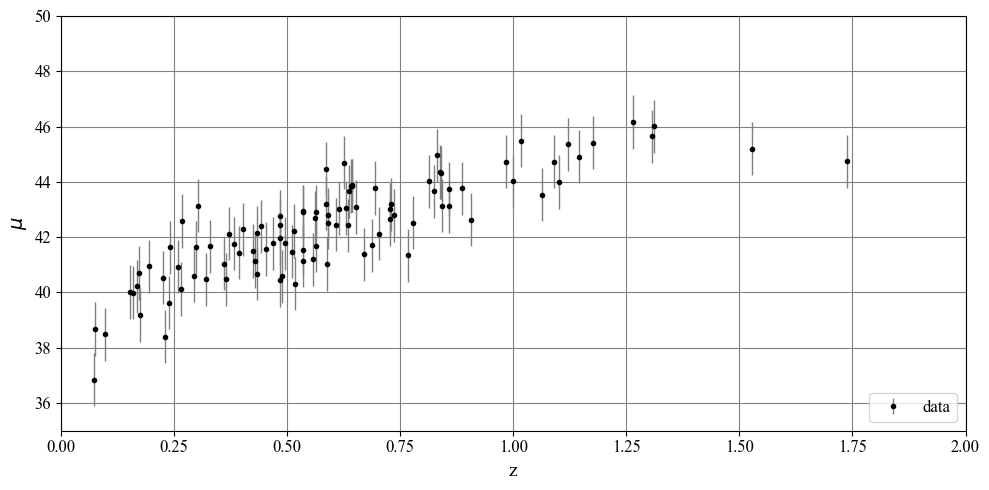

In [4]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

# Fit Data

## Method 1 : Polynomial Regression 

In [7]:
X = np.array([z_sample, mu_sample]).T

In [8]:
from sklearn.model_selection import train_test_split

In [52]:
z_train, z_test, mu_train, mu_test, mu_err_train, mu_err_test = train_test_split(z_sample, mu_sample, dmu_sample, test_size=0.25, random_state=1234)

In [53]:
from astroML.linear_model import PolynomialRegression

In [54]:
model = PolynomialRegression(degree=5)

In [ ]:
model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)

PolynomialRegression(degree=5)

In [56]:
mu_pred = model.predict(z_test.reshape((-1,1)))

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_12028\3893782772.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


Text(0.5, 1.0, 'Prediction: 5th degree polynomial')

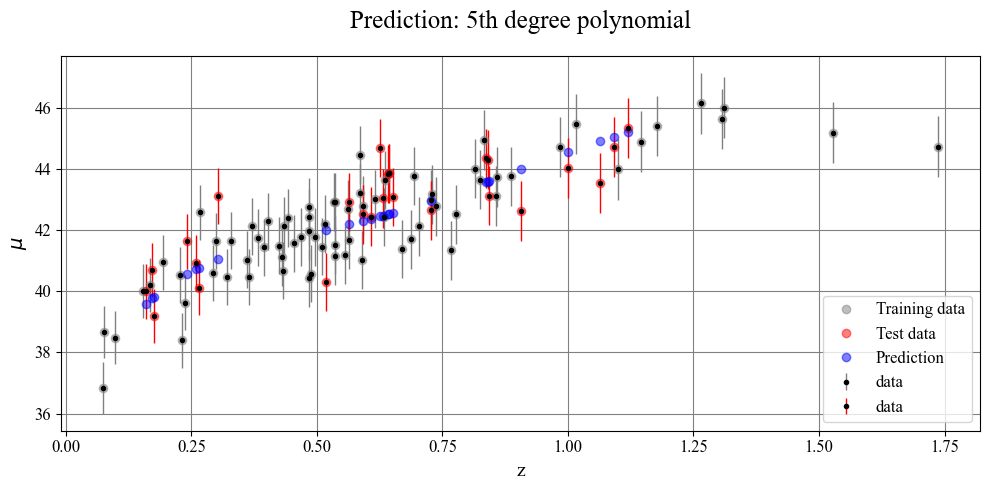

In [57]:
plt.errorbar(z_train, mu_train, mu_err_train, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_test, mu_test, mu_err_test, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(z_train, mu_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(z_test, mu_test, 'o', label='Test data', color='red', alpha=0.5)
plt.plot(z_test, mu_pred, 'o', label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Prediction: %dth degree polynomial' % 5)

## Cross - Validation

In [88]:
n_split = 3

In [99]:
def split_array(array, train_pc, cv_pc, test_pc):
    """
    Splits an array into train, cv and test sets.
    """
    np.random.shuffle(array)
    n = len(array)
    n_train = int(n * train_pc)
    n_cv = int(n * cv_pc)
    n_test = int(n * test_pc)

    train_set = array[:n_train]
    cv_set = array[n_train:n_train+n_cv]
    test_set = array[n_train+n_cv:n_train+n_cv+n_test]

    return train_set, cv_set, test_set

In [ ]:
z_train, z_cv, z_test       = split_array(z_sample, 0.6, 0.2, 0.2)
mu_train, mu_cv, mu_test    = split_array(mu_sample, 0.6, 0.2, 0.2)
dmu_train, dmu_cv, dmu_test = split_array(dmu_sample, 0.6, 0.2, 0.2)